In [1]:
# Importing Libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset

df=pd.read_csv('C:/Users/SATYAM KUMAR/Desktop/Codeway/Customer Churn/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Three unique countries
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

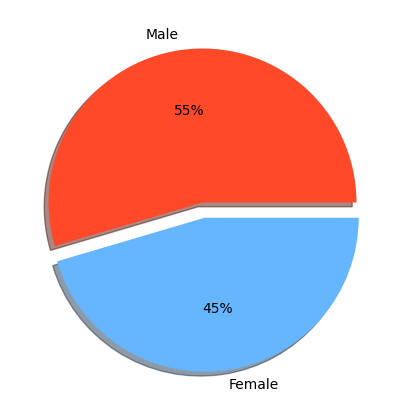

In [5]:
#Gender distribution
plt.figure(figsize=(10, 5))
colors = ['#ff4929', '#66b5ff']  # Specify colors here
plt.pie(df['Gender'].value_counts().values, labels=['Male', 'Female'], autopct='%.f%%', explode=[0, 0.1], shadow=True, colors=colors)
plt.show()

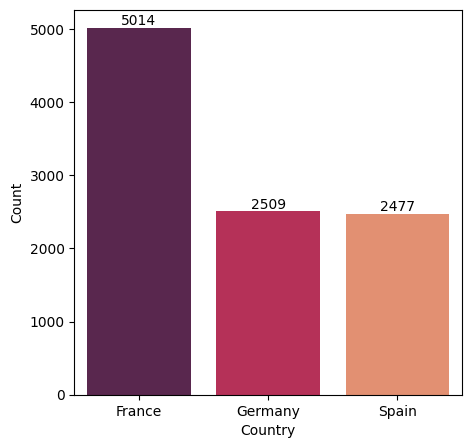

In [6]:
#Geography wise
region = df.Geography.value_counts().to_frame().reset_index()
region.columns = ['Country','Count']
plt.figure(figsize = (5,5))
ax=sns.barplot(x = region['Country'],y = region['Count'],palette='rocket')
for i in ax.containers:
    ax.bar_label(i,)

In [7]:
# Data Cleaning
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

# Encoding
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Geography']=labelencoder.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
x=df.drop(columns='Exited')
y=df['Exited']

In [9]:
# Train Test Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [10]:
# Random Forest Classifier Model

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [11]:
#Model score
model.score(x_train,y_train)

1.0

In [12]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [13]:
#Length
len(y_pred)

3000

In [14]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.83%


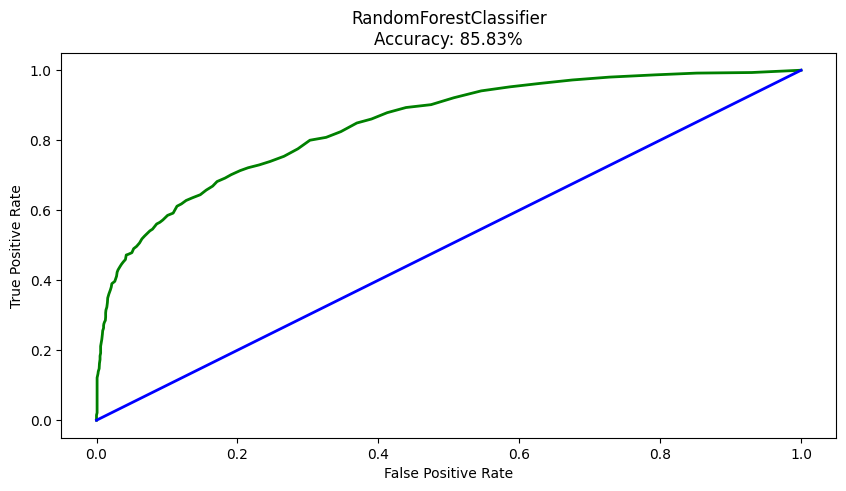

In [15]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='green', lw=2)
plt.plot([0, 1], [0, 1], color='blue', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [16]:
# Create Logistic Regression model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
#Model Score
model_score=model.score(x_train,y_train)
print(model_score)

0.7905714285714286


In [18]:
#Prediction
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [19]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.90%


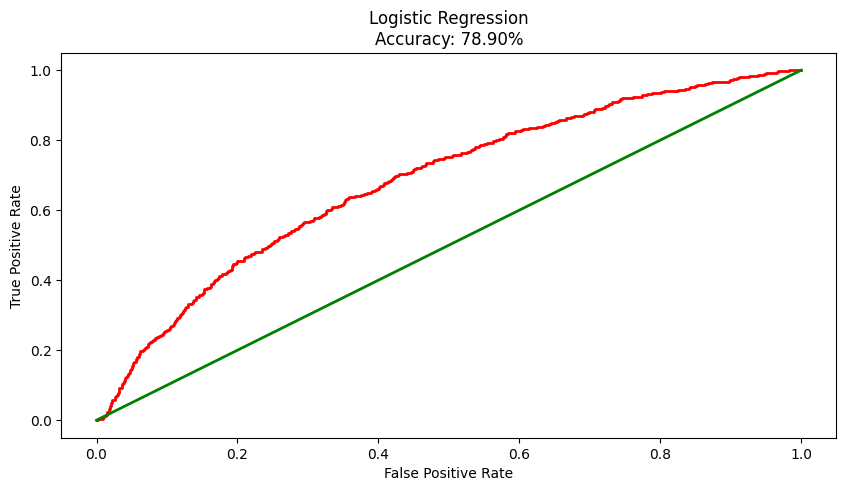

In [20]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='green', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [21]:
#Create Gradient Boosting model
model=GradientBoostingClassifier()
model.fit(x_train,y_train)


GradientBoostingClassifier()

In [22]:
#Model Score
model_score=model.score(x_train, y_train)
print(model_score)

0.8734285714285714


In [23]:
#Prediction
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 1]


In [24]:
#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.37%


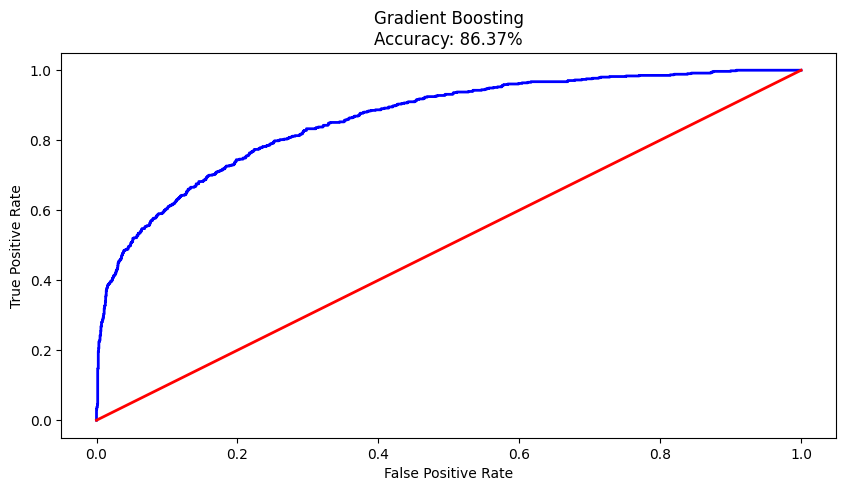

In [25]:
#Visualization
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [26]:
# Model Comparision

#Define model names
model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting"]
#Define lists to store accuracies
acc_list = []

In [27]:
#Calculate and store accuracies for each model
for model in [RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

In [28]:
#DataFrame to store results
model_results = pd.DataFrame({"Model": model_names,
                              "Accuracy_Score": acc_list})
model_results

,Model,Accuracy_Score
0,Random Forest,0.858
1,Logistic Regression,0.789
2,Gradient Boosting,0.864


<Axes: xlabel='Model', ylabel='Accuracy_Score'>

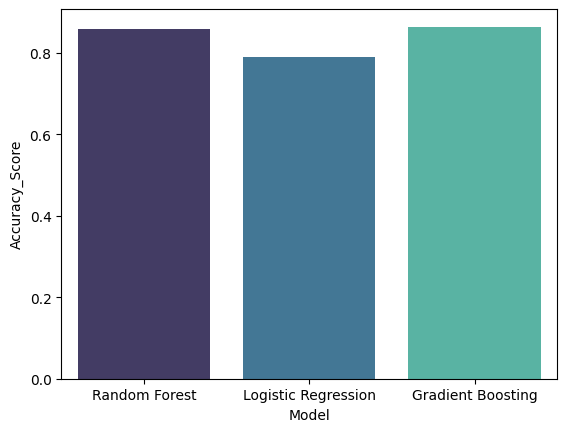

In [29]:
#Barplot of accuracies
sns.barplot(x="Model", y="Accuracy_Score", palette = 'mako' ,data=model_results)